# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [1]:
from __future__ import print_function
import os
data_path = ['/Users/keonwookim/Desktop/중앙대학교/인공지능/Intel Machine Learning Materials/data']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
# 데이터를 조사하라 -> 행,렬의 개수, feature의 종류, 예측해야하는 값의 범위(분류의 종류)
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath) # pandas는 행렬을 dataframe으로 취급
#data.head()
# 데이터 개요: 4개의 특성 -> 3개의 종
# 학습 목표: 해당 특성들의 값을 보고 어떠한 종인지를 예측하여라

#열 접근
#print(data['sepal_length'])

#행 접근
#print(data.loc[0:3]) 
print(data.loc[data['sepal_length']>7])  #하나의 행을 레이블을 기반 접근 location, 조건 가능 - 인간 친화
#print(data.iloc[0:3]) # integer location - 정수 기반 행 접근 - 기계 친화

     sepal_length  sepal_width  petal_length  petal_width         species
102           7.1          3.0           5.9          2.1  Iris-virginica
105           7.6          3.0           6.6          2.1  Iris-virginica
107           7.3          2.9           6.3          1.8  Iris-virginica
109           7.2          3.6           6.1          2.5  Iris-virginica
117           7.7          3.8           6.7          2.2  Iris-virginica
118           7.7          2.6           6.9          2.3  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica


In [3]:
# Number of rows(데이터의 개수)
print(data.shape) # shape -> (row, column) - 데이터의 전체 크기
print(data.shape[0])

# Column names(특징의 개수, 종류)
print(data.columns) #인덱스
print(data.columns.tolist()) #리스트화

# Data types(feature value의 자료형)
print(data.dtypes)

(150, 5)
150
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [4]:
# The str method maps the following function to each entry as a string
# 문자열 교체하기(대치하기)
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [5]:
# One way to count each species
# 학습데이터에 결과값의 분포 확인하기
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
# Select just the rows desired from the 'describe' method and add in the 'median'
# 데이터에 대한 통계적인 정보 및 최대, 최소값에 대한 정보를 확인할 수 있다.
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
print(stats_df)
#print(stats_df.loc['range'])
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000


,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [9]:
# The mean calculation 각 그룹별 특징 구하기
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [14]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [15]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

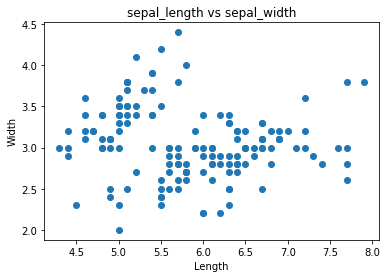

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib(시각화)
scatter = plt.scatter(data['sepal_length'], data['sepal_width'])

plt.title('sepal_length vs sepal_width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

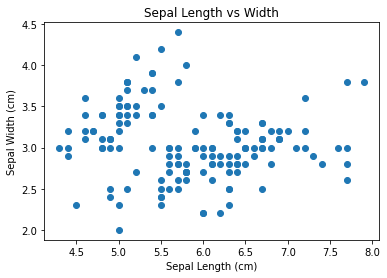

In [19]:
# A simple scatter plot with Matplotlib(시각화)
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width) #산포도

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

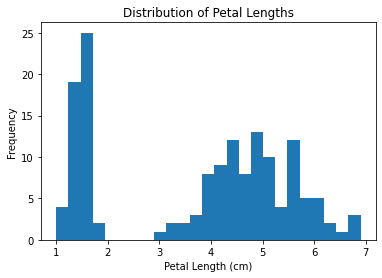

In [20]:
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

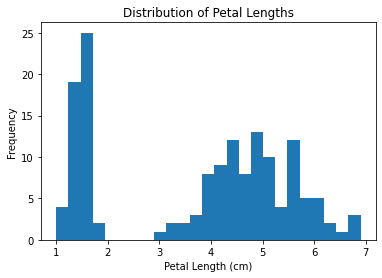

In [21]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [24]:
try:
    import seaborn as sns

except:
    print('Seaborn must be installed for this course. Execute the following:')
    print('`conda install seaborn`')
    print('from a terminal and restart the kernel.')

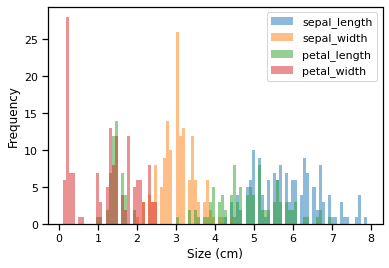

In [39]:
sns.set_context('notebook') # plot의 형태 결정

# This uses the `.plot.hist` method
#these unique values will be grouped into ranges. These ranges are called bins or buckets 
ax = data.plot.hist(bins=100, alpha=0.5) #bin: data의 세밀도(높을 수록 세세함), alpha: 색 불투명도
ax.set_xlabel('Size (cm)');

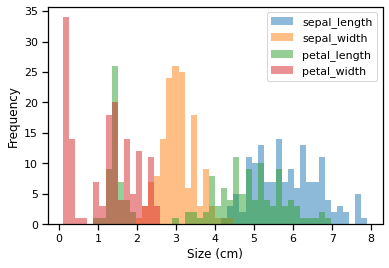

In [40]:
ax = data.plot.hist(bins=50, alpha=0.5) 
ax.set_xlabel('Size (cm)');

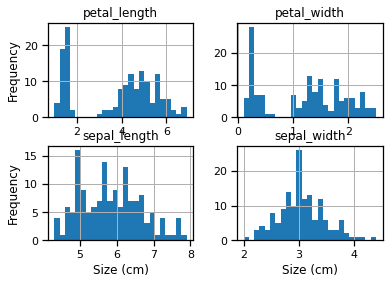

In [45]:
# To create four separate plots, use Pandas `.hist` method, 하나가 아닌 각각의 형태 보기
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

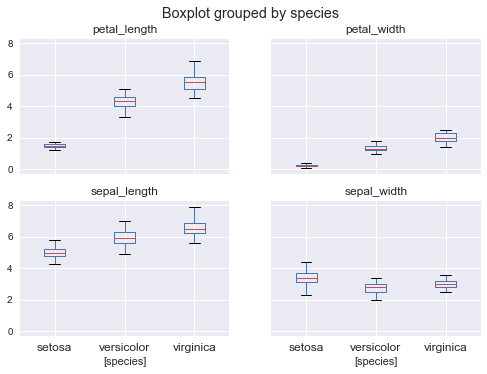

In [18]:
# Pandas plotting functionality is pretty awesome!
# Here we have four separate plots

data.boxplot(by='species');

# boxplot의 기능
# 박스는 25, 75 퀀타일에 해당되는 값
# 중간의 선은 미디움 값을 뜻함
# 위, 아래 선은 min, max
# 둥근 점은 out-layer(통계외적인 데이터)

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [19]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


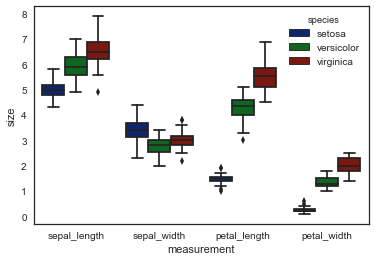

In [20]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

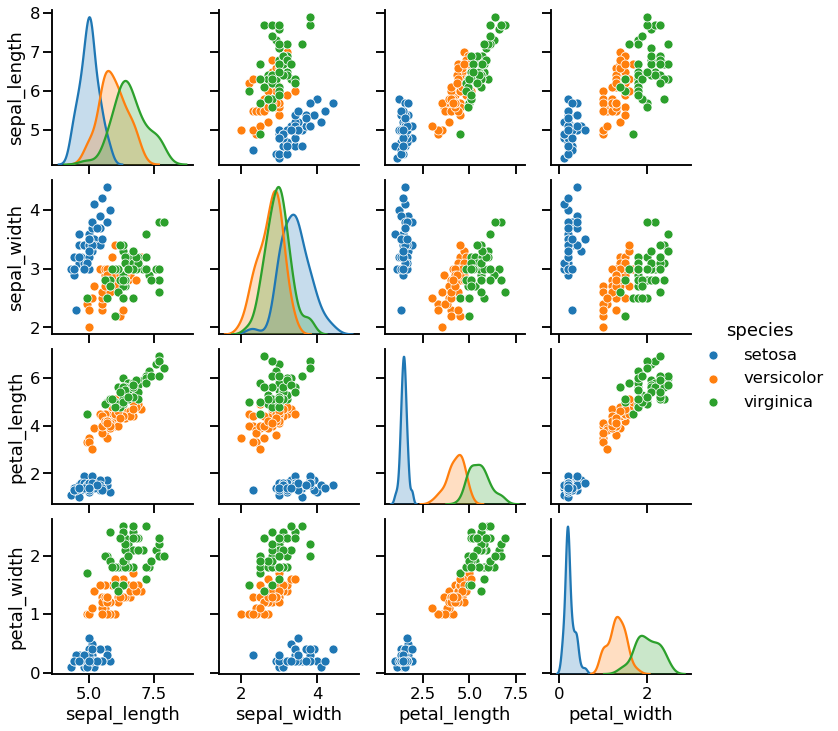

In [48]:
# pairplot 각각의 특징들의 scatter plot를 뽑음
sns.set_context('talk')
sns.pairplot(data, hue='species'); # hue = group by